# Estudo de Caso BellaBeat com Phyton e R

# Sobre a empresa : 

A Bellabeat é uma empresa de tecnologia fundada por Urška Sršen e Sando Mur, que fabrica produtos inteligentes para a saúde das mulheres. A empresa coleta dados sobre atividade, sono, estresse e saúde reprodutiva para fornecer às mulheres conhecimentos sobre sua saúde e hábitos.

# 1. Perguntar 

## 1.1 Questões para analise 

* Quem são os usuarios que a equipe de Marketing da BellaBeat está tentando alcançar ?

* Como otimizar os dispositivos da melhor maneira com base nos gostos dos usuarios ?

* No que a BellaBeat pode investir com base nos gostos dos usuarios ?

## 1.2 Tarefa de negócio 

A tarefa de negócios é analisar dados de dispositivos inteligentes para entender como os consumidores usam esses dispositivos, e usar esses insights para orientar a estratégia de marketing da empresa Bellabeat. O objetivo é identificar novas oportunidades de crescimento e apresentar recomendações de alto nível para a equipe executiva. Como analista de dados júnior, minha responsabilidade é coletar, analisar e interpretar dados relevantes para descobrir insights aplicáveis à estratégia de marketing da empresa.

Stakeholders:

* Urška Sršen: Cofundadora e CEO da Bellabeat
* Sando Mur: Matemático e cofundador da Bellabeat; membro-chave da equipe executiva da Bellabeat

# 2. Preparar

## 2.1 Dataset usado 

A fonte de dados usada para nosso estudo de caso é o FitBit Fitness Tracker Data. Este conjunto de dados está armazenado no Kaggle e foi disponibilizado através do Mobius.

## 2.2 Como você está lidando com o licenciamento, a privacidade, a segurança e a acessibilidade?

Verificando os metadados do nosso conjunto de dados, podemos confirmar que é de código aberto. O proprietário dedicou o trabalho ao domínio público renunciando a todos os seus direitos sobre o trabalho em todo o mundo sob a lei de direitos autorais, incluindo todos os direitos conexos e conexos, na medida permitida por lei. Você pode copiar, modificar, distribuir e executar o trabalho, mesmo para fins comerciais, tudo sem pedir permissão

## 2.3 Há algum problema com os dados?

No momento, os únicos problemas indetificados são: 1. Os dados estão desatualizados | 2. O tamanho da amostra pode não representar a população em geral | 3. Duplicadas e valores nulos podem ser um problema de coleta.

## 2.4 Descrição de todas as fontes de dados usadas 

Vou selecionar as tabelas que contem os dados que resolvem e ajudam a na minha tarefa de negócio são eles : 1. dailyActivity_merged || 2. sleepDay_merged || 3. hourlySteps_merged

**DailyActivity_merged**: A tabela é divida entre atividade diária durante 31 dias de 33 usuários. Acompanhamento diário: Passos, Distância, Intensidades, Calorias, com isso podemos ver o quão ativos os usarios são em relação ao dispositivo

**SleepDay_merged**: Registros diários de sono, rastreados por: contagem total de sonos por dia, total de minutos, tempo total na cama

**HourlySteps_merged**: Passos por hora em 31 dias de 33 usuários

# 3. Processar

## 3.1 Processando os dados em R 

Optei por fazer a manipulação e tratamento dos dados em R por conta da melhor perfomace para esta atividade

## 3.2 Importando Libraries 

In [1]:
library("tidyverse")
library("janitor")
library("ggpubr")
library("here")
library("skimr")
library("lubridate")
library("ggrepel")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




ERROR: Error in library("ggpubr"): there is no package called ‘ggpubr’


In [9]:
library("reticulate")

## 3.3 Importando base deDados 

Primeiro vamos importar a base de dados que sera usada para a análise de acordo com os objetivos de negócio 

In [10]:
daily_activity <- read_delim("/kaggle/input/dadosbellabeat/dailyActivity_merged.csv", delim = ";")
hourly_steps <- read_delim("/kaggle/input/dadosbellabeat/hourlySteps_merged.csv", delim = ";")
daily_sleep <- read_delim("/kaggle/input/dadosbellabeat/sleepDay_merged.csv", delim = ";")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): ActivityDate, TotalDistance, TrackerDistance, VeryActiveDistance, M...
dbl (7): Id, TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActi...
num (2): LoggedActivitiesDistance, SedentaryActiveDistance

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, To

In [11]:
head(daily_activity)
str(daily_activity)

head(daily_sleep)
str(daily_sleep)

head(hourly_steps)
str(hourly_steps)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,05/01/2016,10602,681.000.000.000.000,681.000.000.000.000,0,229.000.000.000.000,160.000.000.000.000,292.000.000.000.000,0,33,35,246,730,1820
1503960366,05/02/2016,14727,971.000.000.000.000,971.000.000.000.000,0,321.000.000.000.000,570.000.000.000.000,592.000.000.000.000,0,41,15,277,798,2004
1503960366,05/03/2016,15103,966.000.000.000.000,966.000.000.000.000,0,373.000.000.000.000,105.000.000.000.000,488.000.000.000.000,0,50,24,254,816,1990
1503960366,05/04/2016,11100,715.000.000.000.000,715.000.000.000.000,0,246.000.000.000.000,870.000.000.000.000,38.200.000.000.000,0,36,22,203,1179,1819
1503960366,05/05/2016,14070,890.000.000.000.000,890.000.000.000.000,0,292.000.000.000.000,108.000.000.000.000,488.000.000.000.000,0,45,24,250,857,1959
1503960366,05/06/2016,12159,803.000.000.000.000,803.000.000.000.000,0,197.000.000.000.000,25,581.000.000.000.000,0,24,6,289,754,1896


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "05/01/2016" "05/02/2016" "05/03/2016" "05/04/2016" ...
 $ TotalSteps              : num [1:940] 10602 14727 15103 11100 14070 ...
 $ TotalDistance           : chr [1:940] "681.000.000.000.000" "971.000.000.000.000" "966.000.000.000.000" "715.000.000.000.000" ...
 $ TrackerDistance         : chr [1:940] "681.000.000.000.000" "971.000.000.000.000" "966.000.000.000.000" "715.000.000.000.000" ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : chr [1:940] "229.000.000.000.000" "321.000.000.000.000" "373.000.000.000.000" "246.000.000.000.000" ...
 $ ModeratelyActiveDistance: chr [1:940] "160.000.000.000.000" "570.000.000.000.000" "105.000.000.000.000" "870.000.000.000.000" ...
 $ LightActiveDistance     : chr [1:940] "292.000.000.000.000" "592.000.000.000.000" "

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,5/1/2016 12:00:00 AM,1,369,396
1503960366,5/2/2016 12:00:00 AM,1,277,309
1503960366,5/3/2016 12:00:00 AM,1,273,296
1503960366,5/5/2016 12:00:00 AM,1,247,264
1503960366,5/6/2016 12:00:00 AM,1,334,367
1503960366,5/7/2016 12:00:00 AM,1,331,349


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "5/1/2016 12:00:00 AM" "5/2/2016 12:00:00 AM" "5/3/2016 12:00:00 AM" "5/5/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 1 1 1 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 369 277 273 247 334 331 594 338 383 285 ...
 $ TotalTimeInBed    : num [1:413] 396 309 296 264 367 349 611 342 403 306 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## 3.4 Verificando numero de usuários 

In [12]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(hourly_steps$Id)

[1] 33

[1] 24

[1] 33

## 3.5 Removendo duplicatas 

In [13]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

In [23]:
daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

In [24]:
sum(duplicated(daily_sleep))

[1] 0

## 3.6 Tratando dados 

In [17]:
clean_names(daily_activity)
daily_activity<- rename_with(daily_activity, tolower)
clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,05/01/2016,10602,681.000.000.000.000,681.000.000.000.000,0,229.000.000.000.000,160.000.000.000.000,292.000.000.000.000,0,33,35,246,730,1820
1503960366,05/02/2016,14727,971.000.000.000.000,971.000.000.000.000,0,321.000.000.000.000,570.000.000.000.000,592.000.000.000.000,0,41,15,277,798,2004
1503960366,05/03/2016,15103,966.000.000.000.000,966.000.000.000.000,0,373.000.000.000.000,105.000.000.000.000,488.000.000.000.000,0,50,24,254,816,1990
1503960366,05/04/2016,11100,715.000.000.000.000,715.000.000.000.000,0,246.000.000.000.000,870.000.000.000.000,38.200.000.000.000,0,36,22,203,1179,1819
1503960366,05/05/2016,14070,890.000.000.000.000,890.000.000.000.000,0,292.000.000.000.000,108.000.000.000.000,488.000.000.000.000,0,45,24,250,857,1959
1503960366,05/06/2016,12159,803.000.000.000.000,803.000.000.000.000,0,197.000.000.000.000,25,581.000.000.000.000,0,24,6,289,754,1896
1503960366,05/07/2016,11992,771.000.000.000.000,771.000.000.000.000,0,246.000.000.000.000,212.000.000.000.000,313.000.000.000.000,0,37,46,175,833,1821
1503960366,05/08/2016,10060,658.000.000.000.000,658.000.000.000.000,0,353.000.000.000.000,320.000.000.000.000,273.000.000.000.000,0,44,8,203,574,1740
1503960366,05/09/2016,12022,772.000.000.000.000,772.000.000.000.000,0,345.000.000.000.000,530.000.000.000.000,374.000.000.000.000,0,46,11,206,835,1819


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,5/1/2016 12:00:00 AM,1,369,396
1503960366,5/2/2016 12:00:00 AM,1,277,309
1503960366,5/3/2016 12:00:00 AM,1,273,296
1503960366,5/5/2016 12:00:00 AM,1,247,264
1503960366,5/6/2016 12:00:00 AM,1,334,367
1503960366,5/7/2016 12:00:00 AM,1,331,349
1503960366,5/8/2016 12:00:00 AM,1,594,611
1503960366,5/9/2016 12:00:00 AM,1,338,342
1503960366,5/10/2016 12:00:00 AM,1,383,403


In [25]:
daily_activity <- daily_activity %>%
  rename(date = date) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>%
  rename(date = date) %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

In [19]:
head(hourly_steps)

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


In [30]:
hourly_steps<- hourly_steps %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

In [31]:
clean_names(hourly_steps)
hourly_steps <- rename_with(hourly_steps, tolower)

id,date_time,step_total
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0
1503960366,2016-04-12 06:00:00,0
1503960366,2016-04-12 07:00:00,0
1503960366,2016-04-12 08:00:00,250


In [32]:
hourly_steps <- hourly_steps %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date))

## 3.7 Separando usuarios por tempo de uso 

In [35]:
daily_use <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 10 ~ "low use",
    days_used >= 11 & days_used <= 20 ~ "moderate use", 
    days_used >= 21 & days_used <= 31 ~ "high use", 
  ))

  head(daily_use)

id,days_used,usage
<dbl>,<int>,<chr>
1503960366,25,high use
1644430081,4,low use
1844505072,3,low use
1927972279,5,low use
2026352035,28,high use
2320127002,1,low use


## 3.8 Calculando medias 

In [36]:
daily_average <- daily_activity_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(totalsteps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(totalminutesasleep))

## 3.9 Separando usuarios por nível de atividade 

Peguei essas classificações de um estudo de um usuario do kaggle *"Capstone - Case Study Bellabeat"*, bem como alguns calculos utéis para essa análise. Os dados foram tirados do site: https://www.10000steps.org.au/articles/counting-steps/

Isso foi necessario por não temos nenhuma variável demográfica de nossa amostra, então para determinar o tipo de usuário com os dados que temos. Podemos classificar os usuários por atividade considerando a quantidade diária de passos. Podemos categorizar os usuários da seguinte forma:

* Sedentário - Menos de 5000 passos por dia

* Levemente ativo - Entre 5000 e 7499 passos por dia

* Bastante ativo - Entre 7500 e 9999 passos por dia 

* Muito ativo - Mais de 10.000 passos por dia.
 

In [37]:
user_type <- daily_average %>%
  mutate(user_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

## 3.10 Agrupando dados 

In [34]:
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("id", "date"))
glimpse(daily_activity_sleep)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <chr> "85", "697.000.000.000.000", "628.000.000.000…
$ trackerdistance          <chr> "85", "697.000.000.000.000", "628.000.000.000…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <chr> "188.000.000.000.000", "157.000.000.000.000",…
$ moderatelyactivedistance <chr> "550.000.000.000.000", "690.000.000.000.000",…
$ lightactivedistance      <chr> "606.000.000.000.000", "471.000.000.000.000",…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

In [38]:
daily_use_sleep <- merge(user_type, daily_average, by=c ("id"))


In [39]:
sleep_manage <- daily_activity_sleep %>% 
  group_by(id) %>% 
  summarise(total_sleep = sum(totalminutesasleep))

In [40]:
daily_activity_sleep$totalactivityminutes <- daily_activity_sleep$veryactiveminutes + daily_activity_sleep$fairlyactiveminutes + daily_activity_sleep$lightlyactiveminutes 

In [41]:
daily_activity_manage <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(activity_manage = sum(totalactivityminutes))

## 3.11 Exportando dados para realizar a análise em Python

No caso como eu não consigo estabelecer conexão com o "/kaggle/input/dadosbellabeat" onde os dados foram armazenados eu vou utilizar os codigos que eu usei quando fiz a análise no vs code e subirei os arquivos, sendo assim visualizem os codigos usados para essa atividade.

write.csv(daily_activity_sleep, "D:/Users/ZaccMarc/Desktop/Trilha-Projects/EstudoDeCasoBellaBeat/ProcessPhase/daily_activity_sleep.csv", row.names = FALSE)

write.csv(hourly_steps, "D:/Users/ZaccMarc/Desktop/Trilha-Projects/EstudoDeCasoBellaBeat/ProcessPhase/hourly_steps.csv", row.names = FALSE)

write.csv(daily_use_sleep, "D:/Users/ZaccMarc/Desktop/Trilha-Projects/EstudoDeCasoBellaBeat/ProcessPhase/daily_use_sleep.csv", row.names = FALSE)

write.csv(daily_activity_manage, "D:/Users/ZaccMarc/Desktop/Trilha-Projects/EstudoDeCasoBellaBeat/ProcessPhase/daily_activity_manage.csv", row.names = FALSE)

write.csv(sleep_manage, "D:/Users/ZaccMarc/Desktop/Trilha-Projects/EstudoDeCasoBellaBeat/ProcessPhase/sleep_manage.csv", row.names = FALSE)

# 4. Analisar e Compartilhar 

## 4.1 Realizando a análise em phyton 

Optei por fazer esta análise em phyton por conta da facilidade da linguagem de alto nível, acessibilidade e blibliotecas 

## 4.2 Importando Dados 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
daily_sleep = pd.read_csv('/kaggle/input/dadosbellabeat2/daily_use_sleep.csv', delimiter=',')
daily_manage = pd.read_csv('/kaggle/input/dadosbellabeat2/daily_activity_manage.csv', delimiter=',')
daily_activity = pd.read_csv('/kaggle/input/dadosbellabeat2/daily_activity_sleep.csv', delimiter= ',')
daily_sleep_2 = pd.read_csv('/kaggle/input/dadosbellabeat2/daily_sleep.csv', delimiter= ',')
manage_sleep = pd.read_csv('/kaggle/input/dadosbellabeat2/sleep_manage.csv', delimiter= ',')

In [5]:
daily_used = pd.read_csv('/kaggle/input/dadosbellabeat3/daily_used.csv', delimiter= ',')

In [6]:
daily_used.head(5)

,id,days_used,usage
0,1503960366,25,high use
1,1644430081,4,low use
2,1844505072,3,low use
3,1927972279,5,low use
4,2026352035,28,high use


In [7]:
daily_activity.head(5)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,totalactivityminutes
0,1503960366,2016-04-12,13162,85,85,0.0,188.000.000.000.000,550.000.000.000.000,606.000.000.000.000,0.0,25,13,328,728,1985,1,327,346,366
1,1503960366,2016-04-13,10735,697.000.000.000.000,697.000.000.000.000,0.0,157.000.000.000.000,690.000.000.000.000,471.000.000.000.000,0.0,21,19,217,776,1797,2,384,407,257
2,1503960366,2016-04-15,9762,628.000.000.000.000,628.000.000.000.000,0.0,214.000.000.000.000,126.000.000.000.000,283.000.000.000.000,0.0,29,34,209,726,1745,1,412,442,272
3,1503960366,2016-04-16,12669,816.000.000.000.000,816.000.000.000.000,0.0,271.000.000.000.000,410.000.000.000.000,504.000.000.000.000,0.0,36,10,221,773,1863,2,340,367,267
4,1503960366,2016-04-17,9705,648.000.000.000.000,648.000.000.000.000,0.0,319.000.000.000.000,780.000.000.000.000,251.000.000.000.000,0.0,38,20,164,539,1728,1,700,712,222


In [8]:
daily_activity.describe()

,id,totalsteps,loggedactivitiesdistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,totalactivityminutes
count,4.100000e+02,410.000000,4.100000e+02,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,8514.909756,6.749024e+14,6.853659e+14,25.046341,17.924390,216.541463,712.100000,2389.295122,1.119512,419.173171,458.482927,259.512195
std,2.060863e+09,4157.375584,4.090735e+15,6.820868e+15,36.218237,22.418593,86.705299,166.179395,758.435040,0.346636,118.635918,127.455140,92.173330
min,1.503960e+09,17.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000,2.000000
25%,3.977334e+09,5188.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,158.000000,631.250000,1841.000000,1.000000,361.000000,403.750000,206.500000
50%,4.702922e+09,8913.000000,0.000000e+00,0.000000e+00,9.000000,11.000000,208.000000,717.000000,2207.000000,1.000000,432.500000,463.000000,263.500000
75%,6.962181e+09,11370.250000,0.000000e+00,0.000000e+00,38.000000,26.750000,263.000000,782.750000,2920.000000,1.000000,490.000000,526.000000,315.500000
max,8.792010e+09,22770.000000,4.080000e+16,1.000000e+17,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000,540.000000


In [9]:
daily_manage.head(5)

,id,activity_manage
0,1503960366,7283
1,1644430081,1053
2,1844505072,442
3,1927972279,425
4,2026352035,7193


In [52]:
daily_sleep.head(5)

,id,mean_daily_steps.x,mean_daily_calories.x,mean_daily_sleep.x,user_type,mean_daily_steps.y,mean_daily_calories.y,mean_daily_sleep.y
0,1503960366,12405.680000,1872.280000,360.280000,very active,12405.680000,1872.280000,360.280000
1,1644430081,7967.750000,2977.750000,294.000000,fairly active,7967.750000,2977.750000,294.000000
2,1844505072,3477.000000,1676.333333,652.000000,sedentary,3477.000000,1676.333333,652.000000
3,1927972279,1490.000000,2316.200000,417.000000,sedentary,1490.000000,2316.200000,417.000000
4,2026352035,5618.678571,1540.785714,506.178571,lightly active,5618.678571,1540.785714,506.178571


In [11]:
daily_used.head(5)

,id,days_used,usage
0,1503960366,25,high use
1,1644430081,4,low use
2,1844505072,3,low use
3,1927972279,5,low use
4,2026352035,28,high use


In [51]:
manage_sleep.head(5)

,id,total_sleep,tempo_dormindo
0,1503960366,9007,Monitoramento Alto
1,1644430081,1176,Monitoramento Baixo
2,1844505072,1956,Monitoramento Moderado
3,1927972279,2085,Monitoramento Moderado
4,2026352035,14173,Monitoramento Alto


## 4.3 Quem são os usuarios que a equipe de Marketing da BellaBeat está tentando alcançar

### 4.3.1 CLASSIFICANDO OS USUARIOS POR NÍVEL DE ATIVIDADE

In [13]:
daily_avarage = daily_activity.groupby('id')[['totalsteps', 'calories', 'totalminutesasleep']].mean()

In [14]:
daily_avarage.head() 

,totalsteps,calories,totalminutesasleep
id,,,
1503960366,12405.680000,1872.280000,360.280000
1644430081,7967.750000,2977.750000,294.000000
1844505072,3477.000000,1676.333333,652.000000
1927972279,1490.000000,2316.200000,417.000000
2026352035,5618.678571,1540.785714,506.178571


In [15]:
def user_type(row):
    steps = row['totalsteps']
    if steps < 5000:
        return 'Sedentário'
    elif steps < 7500:
        return 'Levemente Ativo'
    elif steps < 10000:
        return 'Razoavelmente Ativo'
    else:
        return 'Muito Ativo'

In [16]:
daily_avarage['activitylevel'] = daily_avarage.apply(user_type, axis=1)

In [17]:
daily_avarage.head()

,totalsteps,calories,totalminutesasleep,activitylevel
id,,,,
1503960366,12405.680000,1872.280000,360.280000,Muito Ativo
1644430081,7967.750000,2977.750000,294.000000,Razoavelmente Ativo
1844505072,3477.000000,1676.333333,652.000000,Sedentário
1927972279,1490.000000,2316.200000,417.000000,Sedentário
2026352035,5618.678571,1540.785714,506.178571,Levemente Ativo


In [18]:
category_counts = daily_avarage['activitylevel'].value_counts()
total_ids = len(daily_avarage)

category_percentages = (category_counts / total_ids) * 100

print(category_percentages)

Razoavelmente Ativo    37.500000
Muito Ativo            20.833333
Sedentário             20.833333
Levemente Ativo        20.833333
Name: activitylevel, dtype: float64


In [19]:
category_percentages_rounded = category_percentages.round(2)
activity_percentages = category_percentages_rounded.map("{:.2f}%".format)

print(activity_percentages)

Razoavelmente Ativo    37.50%
Muito Ativo            20.83%
Sedentário             20.83%
Levemente Ativo        20.83%
Name: activitylevel, dtype: object


### 4.3.2 Análise Descritiva

Farei um grafico para visualizar as porcentagens do nível de atividade 

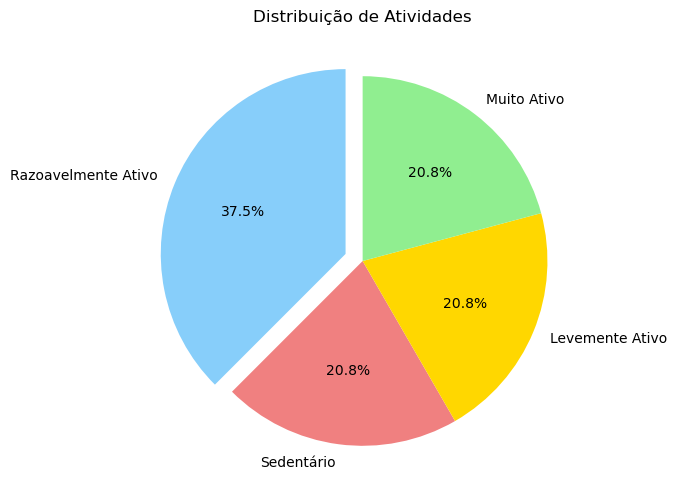

In [20]:
categorias = ['Razoavelmente Ativo', 'Sedentário', 'Levemente Ativo', 'Muito Ativo']
porcentagens = [37.50, 20.83, 20.83, 20.83]

plt.figure(figsize=(6, 6))
cores = ['lightskyblue', 'lightcoral', 'gold', 'lightgreen']
explode = (0.1, 0, 0, 0) 

plt.pie(porcentagens, labels=categorias, colors=cores, explode=explode, autopct='%1.1f%%', shadow=False, startangle=90)

plt.title('Distribuição de Atividades')

plt.show()

#### Nivel de Atividade do dispositivo : 

1. Bastante ativo : cerca de 38% dos usuarios avalidados 

2. Muito ativo: cerca de 21% dos usuarios avaliados 

3. levemente ativos : cerca de 21% dos usuarios avaliados 

4. sedentarios : cerca de 21% dos usuarios avaliados

### 4.3.3 CLASSIFICANDO OS USUARIOS POR TEMPO ATIVO

In [21]:
# Calculando a porcentagem por id do tempo ativo do dataframe "daily_used"

porcentagens = daily_used['usage'].value_counts(normalize=True) * 100

In [22]:
porcentagens = porcentagens.map("{:.2f}%".format)
print(porcentagens)

high use        50.00%
low use         37.50%
moderate use    12.50%
Name: usage, dtype: object


### 4.3.4 Análise Descritiva

Farei um grafico para visualizar as porcentagens do tempo ativo

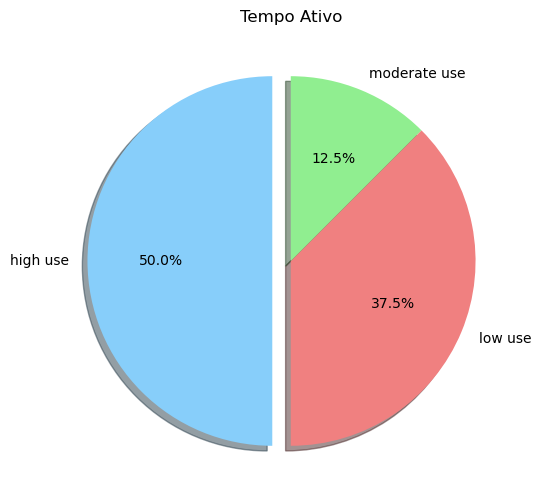

In [23]:
categorias = ['high use', 'low use', 'moderate use']
porcentagens = [50.00, 37.50, 12.50]

plt.figure(figsize=(6, 6))
cores = ['lightskyblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0, 0) 

plt.pie(porcentagens, labels=categorias, colors=cores, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Tempo Ativo')

plt.show()

#### Tempo ativo no dia 

1. Alto uso : 50% dos usuarios 

2. Uso moderado : 12% dos usuarios 

3. Baixo uso : 38% dos usuarios

### 4.3.5 Conclusão 1:

##### Como podemos ver os usuários foram classificados e separados em nivel de atividade e tempo ativo, sendo assim, eles são em maioria usuarios bastante ativos, com alto uso diario do dispositivo.

## 4.4 Quaias são os pontos de melhoria que os insights com base no conhecimento do usuario apontam 

### 4.4.1 No Monitoramento da atividade diaria 

#### Qual é a classificação do tempo de Monitoramento dos usuarios 

In [24]:
descricao = daily_manage['activity_manage'].describe()
descricao

count      24.000000
mean     4433.333333
std      3121.523759
min       242.000000
25%      1015.500000
50%      5859.500000
75%      7215.500000
max      8901.000000
Name: activity_manage, dtype: float64

In [25]:
def activity_manage(row):
    minutes = row['activity_manage']
    if minutes < 1015.500000:
        return 'Monitoramento Baixo'
    elif minutes < 5859.500000:
        return 'Monitoramento Moderado'
    else:
        return 'Monitoramento Muito Alto'

In [26]:
daily_manage['activitymanage'] = daily_manage.apply(activity_manage, axis=1)
daily_manage.head(5)

,id,activity_manage,activitymanage
0,1503960366,7283,Monitoramento Muito Alto
1,1644430081,1053,Monitoramento Moderado
2,1844505072,442,Monitoramento Baixo
3,1927972279,425,Monitoramento Baixo
4,2026352035,7193,Monitoramento Muito Alto


In [27]:
activity_counts = daily_manage['activitymanage'].value_counts()
total_ids = len(daily_manage)

category_percentages = (activity_counts / total_ids) * 100

print(category_percentages)

Monitoramento Muito Alto    50.0
Monitoramento Moderado      25.0
Monitoramento Baixo         25.0
Name: activitymanage, dtype: float64


In [28]:
activity_counts = daily_manage['activitymanage'].value_counts()
total_ids = len(daily_manage)

category_percentages = (activity_counts / total_ids) * 100

print(category_percentages)

Monitoramento Muito Alto    50.0
Monitoramento Moderado      25.0
Monitoramento Baixo         25.0
Name: activitymanage, dtype: float64


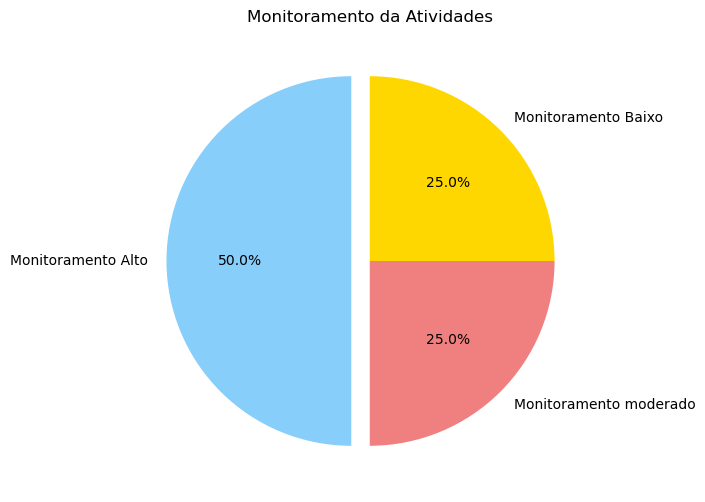

In [29]:
categorias = ['Monitoramento Alto', 'Monitoramento moderado', 'Monitoramento Baixo']
porcentagens = [50.0,25.0, 25.0]

plt.figure(figsize=(6, 6))
cores = ['lightskyblue', 'lightcoral', 'gold', 'lightgreen']
explode = (0.1, 0, 0) 

plt.pie(porcentagens, labels=categorias, colors=cores, explode=explode, autopct='%1.1f%%', shadow=False, startangle=90)

plt.title('Monitoramento da Atividades')

plt.show()

#### Qual é seu status ao longo do tempo ?

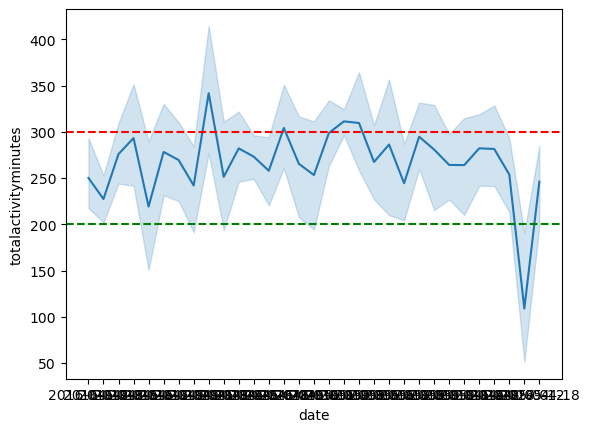

In [30]:
# Vou pegar um de Monitoramento Alto, moderado e baixo para verificar em cada um seu crexcimento ou diminuição com o tempo 

ids = [1503960366, 2026352035, 3977333714, 4319703577, 4388161847, 4445114986, 4702921684,  5553957443, 5577150313, 6117666160, 6962181067, 8378563200]  

filtered_data = daily_activity[daily_activity['id'].isin(ids)]

sns.lineplot(x="date", y="totalactivityminutes", data=filtered_data) # Monitoramento Alto 
plt.axhline(y=300, color='red', linestyle='--')
plt.axhline(y=200, color='green', linestyle='--')

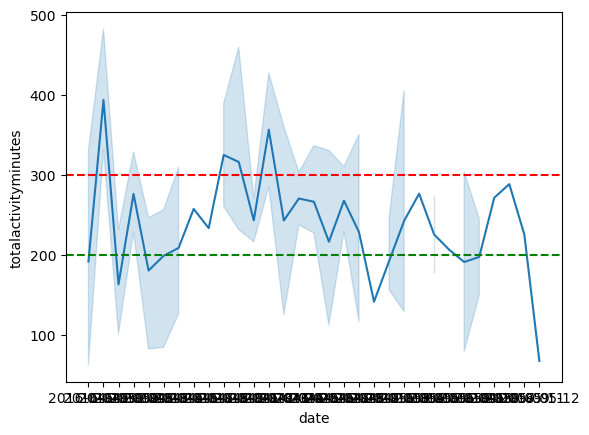

In [31]:
ids1 = [1644430081, 2347167796, 4020332650, 4558609924, 7086361926, 8792009665]
filtered_data1 = daily_activity[daily_activity['id'].isin(ids1)]

sns.lineplot(x="date", y="totalactivityminutes", data=filtered_data1) # Monitoramento Moderado
plt.axhline(y=300, color='red', linestyle='--')
plt.axhline(y=200, color='green', linestyle='--')

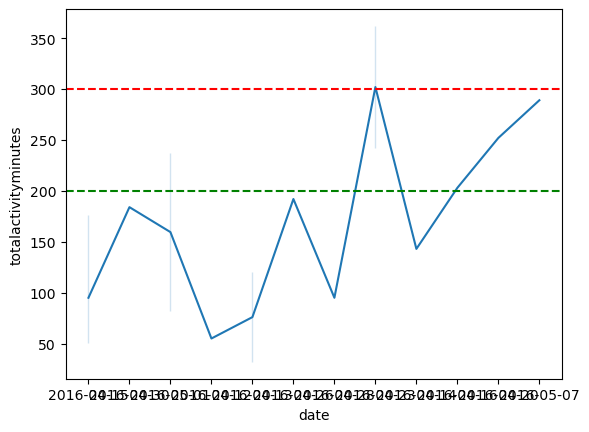

In [32]:
ids2 = [1844505072,	1927972279, 2320127002, 6775888955, 7007744171, 8053475328, 6775888955]
filtered_data2 = daily_activity[daily_activity['id'].isin(ids2)]

sns.lineplot(x="date", y="totalactivityminutes", data=filtered_data2) # Monitoramento Baixo
plt.axhline(y=300, color='red', linestyle='--')
plt.axhline(y=200, color='green', linestyle='--')

# A de Monitoramento Baixo está assim pela falta de dados diarios 

### 4.4.2 Conclusão 2:

**1. Quais são as categorias mais e menos populares no uso de dispositivos inteligentes?**

Foram consideradas para essa informação os unicos dados existentes, ranquados pela quantidade de usuarios por dados fornecidos em questão, respectivamente sendo eles:

- Monitoramento do Sono 

- Monitoramento da Atividade Diária

Por essa questão talvez seja necessario um aumento das features que o dispositivo pode oferecer afim de atrair um maior e diversicado números de usuarios 

**2. Como os consumidores estão usando dispositivos inteligentes em diferentes cenários e contextos?**

No Monitoramento da atividade diaria, qual é a classificação do tempo de Monitoramento dos usuarios ?

- Monitoramento Alto : 50.0% dos usuarios

- Monitoramento Moderado : 25.0% dos usuarios

- Monitoramento Baixo : 25.0% dos usuarios

**3. Qual é seu status ao longo do tempo ?**

Separando a classificação temos :

- Monitoramento Alto: *Por mais que aja uma variação no tempo do monitoramento da atividade diaria, costuma a ficar na margem de 200 a 300 , minutos durante o mês pode ultrapassar ambos os limites mais não é frequente*

- Monitoramento Moderado: *Por mais que aja uma variação no tempo do monitoramento da atividade diaria, costuma a ficar na margem de 200 a 300 , minutos durante o mês pode ultrapassar ambos os limites mais não é frequente, só houve uma queda ao final do mês, porem para podemos afirmar alguma coisa é necessario mais dados e uma análise mais aprofundada* 

- Monitoramento Baixo: *Não é possível afirmar nada pelo pouco de dados que temos sobre este tópico.*

### 4.4.3 No Monitoramento do sono 

#### Qual é o tempo de uso dessa feature ? 

In [33]:
def tempo_dormindo(row):
    minutes = row['total_sleep']
    if minutes < 1761.000000:
        return 'Monitoramento Baixo'
    elif minutes < 8420.000000:
        return 'Monitoramento Moderado'
    else:
        return 'Monitoramento Alto'

In [34]:
manage_sleep['tempo_dormindo'] = manage_sleep.apply(tempo_dormindo, axis=1)

In [35]:
manage_sleep.head(5)

,id,total_sleep,tempo_dormindo
0,1503960366,9007,Monitoramento Alto
1,1644430081,1176,Monitoramento Baixo
2,1844505072,1956,Monitoramento Moderado
3,1927972279,2085,Monitoramento Moderado
4,2026352035,14173,Monitoramento Alto


In [36]:
manage_counts = manage_sleep['tempo_dormindo'].value_counts()
ids_total = len(manage_sleep)

percentages = (manage_counts / ids_total ) * 100

print(percentages)

Monitoramento Alto        50.0
Monitoramento Baixo       25.0
Monitoramento Moderado    25.0
Name: tempo_dormindo, dtype: float64


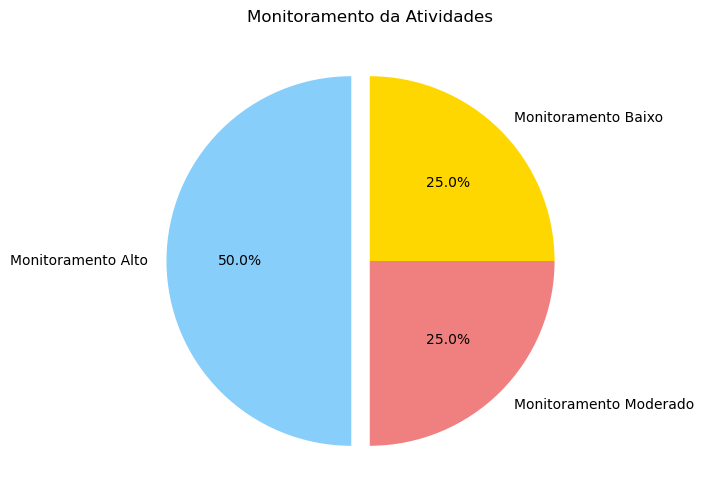

In [37]:
categorias = ['Monitoramento Alto', 'Monitoramento Moderado', 'Monitoramento Baixo']
porcentagens = [50.0,25.0, 25.0]

plt.figure(figsize=(6, 6))
cores = ['lightskyblue', 'lightcoral', 'gold', 'lightgreen']
explode = (0.1, 0, 0) 

plt.pie(porcentagens, labels=categorias, colors=cores, explode=explode, autopct='%1.1f%%', shadow=False, startangle=90)

plt.title('Monitoramento da Atividades')

plt.show()

#### Qual é o seu status ao longo do tempo ?

In [38]:
ids_certos = manage_sleep.loc[manage_sleep['tempo_dormindo'] == 'Monitoramento Alto', 'id'].tolist()
print(ids_certos)

[1503960366, 2026352035, 4319703577, 4388161847, 4445114986, 4702921684, 5553957443, 5577150313, 6117666160, 6962181067, 7086361926, 8378563200]


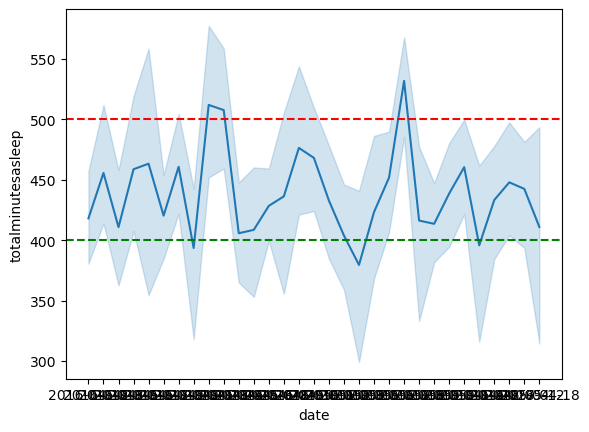

In [39]:
ids = [1503960366, 2026352035, 4319703577, 4388161847, 4445114986, 4702921684, 5553957443, 5577150313, 6117666160, 6962181067, 7086361926, 8378563200]
filtered_data = daily_activity[daily_activity['id'].isin(ids)]

sns.lineplot(x="date", y="totalminutesasleep", data=filtered_data) # Monitoramento Alto
plt.axhline(y=500, color='red', linestyle='--')
plt.axhline(y=400, color='green', linestyle='--')


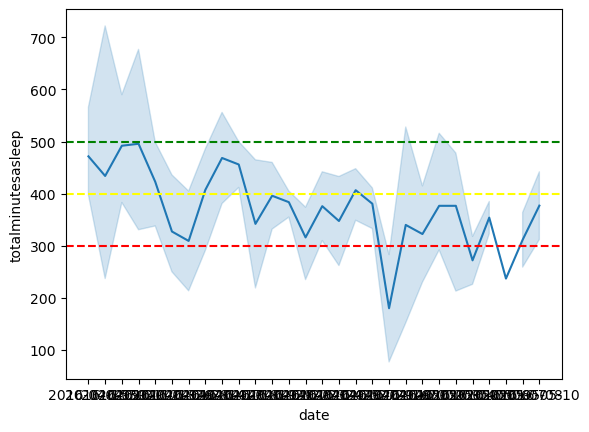

In [40]:
ids1 = [1844505072, 1927972279, 2347167796, 3977333714, 4020332650, 8792009665]
filtered_data1 = daily_activity[daily_activity['id'].isin(ids1)]

sns.lineplot(x="date", y="totalminutesasleep", data=filtered_data1) # Monitoramento Moderado
plt.axhline(y=500, color='green', linestyle='--')
plt.axhline(y=400, color='yellow', linestyle='--')
plt.axhline(y=300, color='red', linestyle='--')

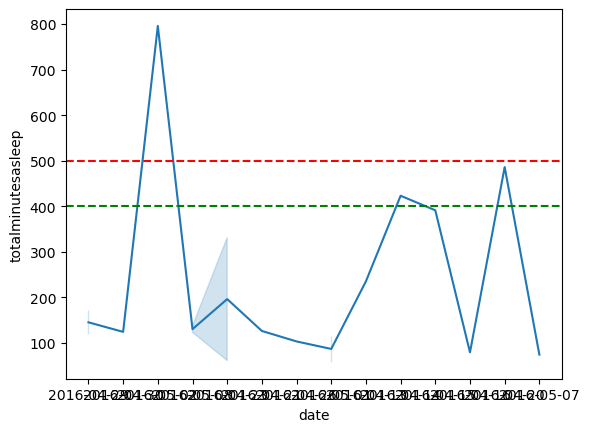

In [41]:
ids2 =[1644430081, 2320127002, 4558609924, 6775888955, 7007744171, 8053475328]
filtered_data2 = daily_activity[daily_activity['id'].isin(ids2)]

sns.lineplot(x="date", y="totalminutesasleep", data=filtered_data2) # Monitoramento Baixo
plt.axhline(y=500, color='red', linestyle='--')
plt.axhline(y=400, color='green', linestyle='--')

# A de Monitoramento Baixo está assim pela falta de dados diarios 

### 4.4.5 Análise descritiva de Monitoramento da Atividade X de Sono 

In [42]:
sleep = daily_activity['totalminutesasleep'].mean()
activity = daily_activity['totalactivityminutes'].mean()
print(sleep, activity)

419.17317073170733 259.5121951219512


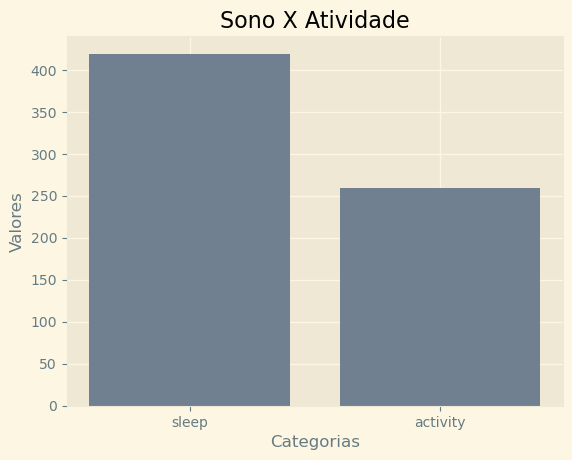

In [43]:
colunas = ['sleep', 'activity']
valor= [419.173171, 259.512195]

plt.style.use('Solarize_Light2')

plt.bar(colunas, valor, color = 'slategrey')

plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.title('Sono X Atividade')
plt.show()

### 4.4.4 Conclusão 3:

**1. Como os consumidores estão usando dispositivos inteligentes em diferentes cenários e contextos?**

No Monitoramento do sono, Qual é o tempo de uso dessa feature ? 

- Monitoramento Alto : 50.0% dos usuarios

- Monitoramento Moderado : 25.0% dos usuarios

- Monitoramento Baixo : 25.0% dos usuarios

**2. Qual é seu status ao longo do tempo ?**

Separando a classificação temos :

- Monitoramento Alto: *Por mais que aja uma variação no tempo do monitoramento do sono, costuma a ficar na margem de 400 a 500 minutos durante o mês, pode ultrapassar ambos os limites mais não é frequente*

- Monitoramento Moderado: *É possível ver uma leve queda no monitoramento ao longo do mês, começa com 500 desce para 400, cai uma vez e depois, mantem em 400, mas para realmentes descobrir algo significativo é preciso de mais dados durante mais tempo* 

- Monitoramento Baixo: *Não é possível afirmar nada pelo pouco de dados que temos sobre este tópico.*

**3. Monitoramento da Atividade X de Sono**

- Como podemos ver através do grafico acima, os recurso de Monitoramento de sono se sobressai consideravelmente em relação ao de monitoramento da atividade. 

## 4.5 O que as correlações e tendências apontam ?

In [44]:
daily_corr = daily_activity[['totalsteps','sedentaryminutes','calories', 'totalactivityminutes','totalminutesasleep']]
daily_corr.corr()

,totalsteps,sedentaryminutes,calories,totalactivityminutes,totalminutesasleep
totalsteps,1.000000,-0.130036,0.406301,0.744648,-0.190344
sedentaryminutes,-0.130036,1.000000,0.098656,-0.262689,-0.601073
calories,0.406301,0.098656,1.000000,0.389983,-0.031699
totalactivityminutes,0.744648,-0.262689,0.389983,1.000000,-0.069294
totalminutesasleep,-0.190344,-0.601073,-0.031699,-0.069294,1.000000


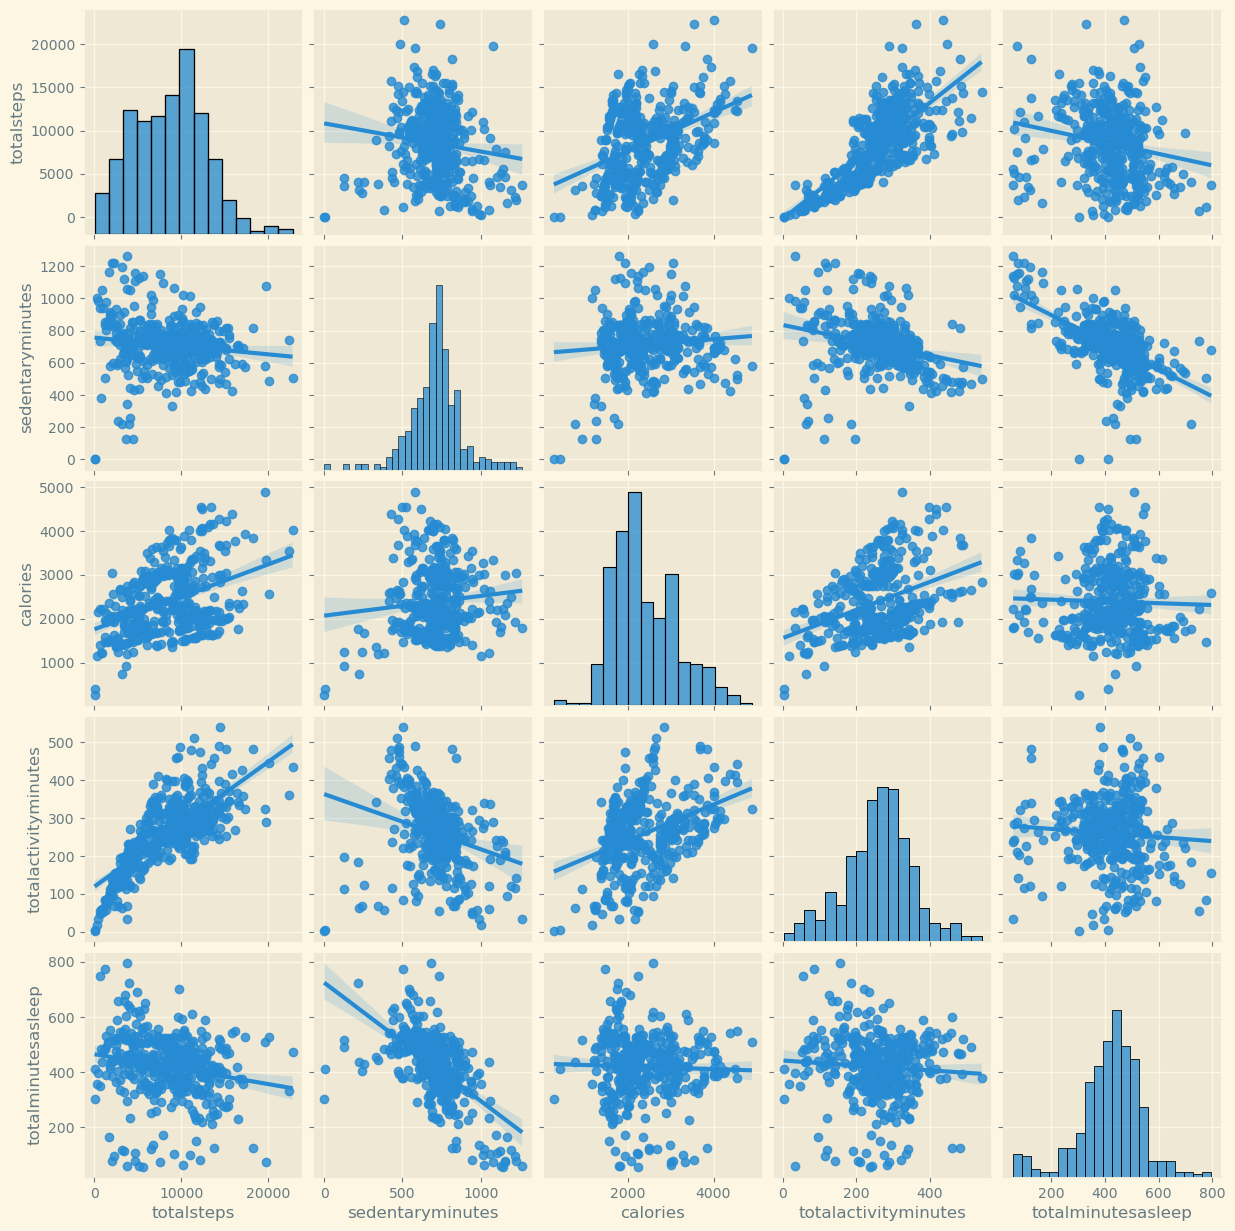

In [45]:

pair_plot = sns.pairplot(daily_corr, kind='reg')


for i, j in zip(*plt.np.triu_indices_from(pair_plot.axes, 1)):
    pair_plot.axes[i, j].annotate(
        pair_plot.axes[i, j].get_title(),
        (0.5, 0.95),
        xycoords='axes fraction',
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        weight='bold'
    )


plt.show()

#### Correlação Tempo de sono x Minutos "sedentarios"

<AxesSubplot:xlabel='sedentaryminutes', ylabel='totalminutesasleep'>

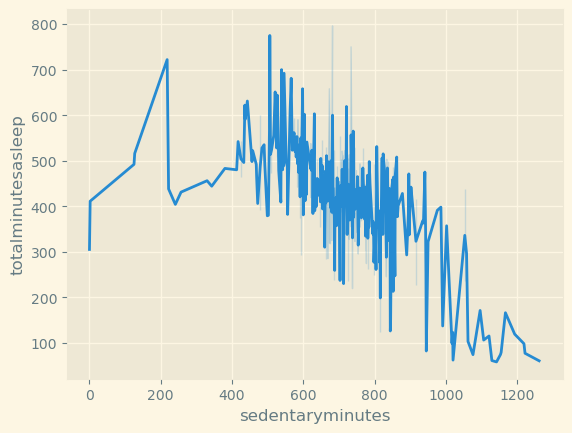

In [46]:
# Essa parece ser uma correlação indicada no grafico acima que irei explorar com mais profundidade 

sns.lineplot(x="sedentaryminutes", y="totalminutesasleep", data=daily_activity) 

<AxesSubplot:xlabel='sedentaryminutes', ylabel='totalminutesasleep'>

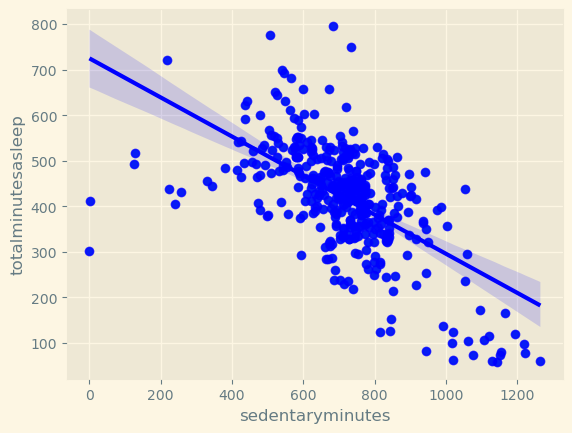

In [47]:
sns.scatterplot(data=daily_activity, x='sedentaryminutes', y='totalminutesasleep')
sns.regplot(data=daily_activity, x='sedentaryminutes', y='totalminutesasleep', color='blue')

#### Através dessas análises é possivel ver uma correlação interessante entre essas duas variaveis com o valor de : -0.601073, que significa que as duas variáveis têm uma tendência a se moverem em direções opostas, mas não necessariamente de forma perfeitamente linear*

#### Agora faremos uma análise do p-value para verificar se este valor é significativo ou não

In [48]:
from scipy.stats import ranksums

In [49]:
sedentaryminutes = daily_activity['sedentaryminutes']
sleep = daily_activity['totalminutesasleep']

**H<sup>null</sup>**
>**O tempo de minutos dormindo não afeta o tempo de minutos inativos**


**H<sup>alt</sup>**
>**O tempo de minutos dormindo afeta o tempo de minutos inativos**


In [50]:
ranksums(sleep, sedentaryminutes)

RanksumsResult(statistic=-21.759424844881643, pvalue=5.624941873954733e-105)

**H<sup>null</sup>**
>**O tempo de minutos dormindo não afeta o tempo de minutos inativos**


### 4.5.1 Conclusão 4: 

Há apenas uma correlação que pareceu significante entre o tempo de sono e os minutos "sedentarios", porém com o teste de hipótese foi descartada esta possibilidade pelo valor do seu p-value

# 5. Agir (Conclusão Geral)

A missão da Bellabeat é capacitar as mulheres, fornecendo-lhes os dados para se descobrirem. 

Por mais que há algumas deficiencias nos dados usados, pela amostra pequena e a falta de detalhes demográficos dos usuários, ainda assim depois de analisar os dados do FitBit Fitness Tracker, ***encontrei alguns insights que ajudariam a influenciar a estratégia de marketing da Bellabeat.***



## 5.1 No que a BellaBeat pode investir com base nos gostos dos usuarios ? 

### 5.1.1 Recomendação 1 

#### Direcionar a equipe de marketing a usuarios ativos que cuidam da saude e principalmente do sono, e motivar os usuarios com features relacionadas ao monitoramento dele, integrando funcionalidades ao serviços e produtos existentes e/ ou criando novos, sempre correlacionando essa idea ao público que são as mulheres com o principal objetivo de atender as suas necessidades.

### 5.1.2 Recomendação 2

#### Integrar ao produto leaf e ao dispositivo da bellabeat uma experiencia mais detalhada e imersiva na analise do sono direcionado a mulheres 

### 5.1.3 Recomendação 3

#### Talvez diferentes features e ou eventos pode ser uma boa estratégia para consolidar o usuario e o manter ativos com os produtos da bellabeat, não é algo definitivo e precisaria de uma análise mais profunda para se afirmar algo, porém pode ser uma tendencia a queda no tempo ativo dos usuarios futuramente.

#### Obrigado pelo seu interesse no meu estudo de caso Bellabeat! 

#### Este é meu primeiro projeto usando Python e R. Agradeço quaisquer comentários e recomendações para melhorias!